In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from data import fetch_housing_data
from pprint import pprint
%matplotlib inline

In [4]:
fetch_housing_data()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1076)>

In [5]:
housing_data = pd.read_csv("datasets/housing/housing.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


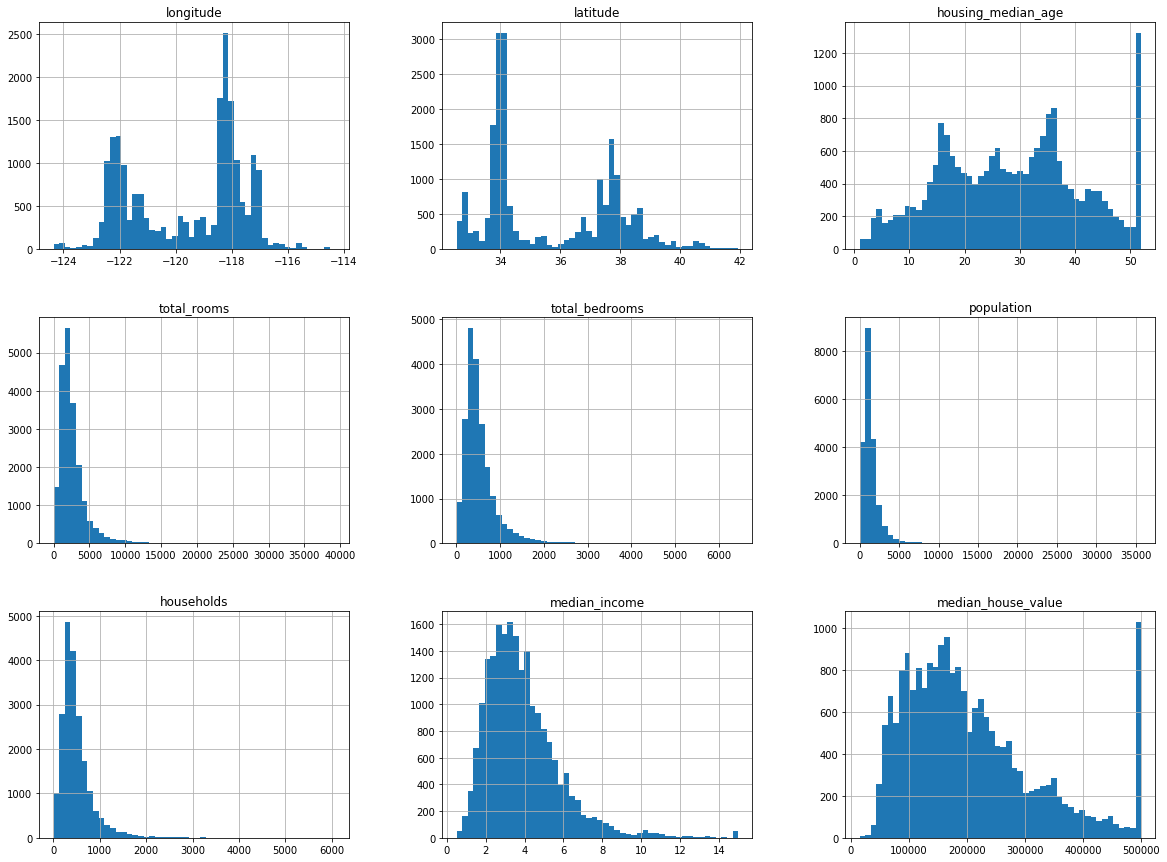

In [9]:
housing_data.hist(bins = 50, figsize=(20,15))
plt.show()

In [10]:
np.random.seed(42)


def split_train_test(data, ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing_data, 0.2)

In [12]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(housing_data, test_size = 0.2, random_state = 42)

In [14]:
print(len(train_data), "train +", len(test_data), "test")

16512 train + 4128 test


## stratified sampling - right no of instances is sampled from each age group(Example in here) to relfect all in data 

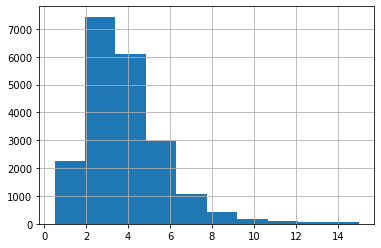

In [15]:
housing_data['median_income'].hist()
plt.show()

In [16]:
housing_data['income_cat'] = np.ceil(housing_data['median_income']/ 1.5)
housing_data['income_cat'].where(housing_data['income_cat']<5, 5.0, inplace=True)

In [17]:
housing_data['income_cat'].value_counts()/len(housing_data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [18]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


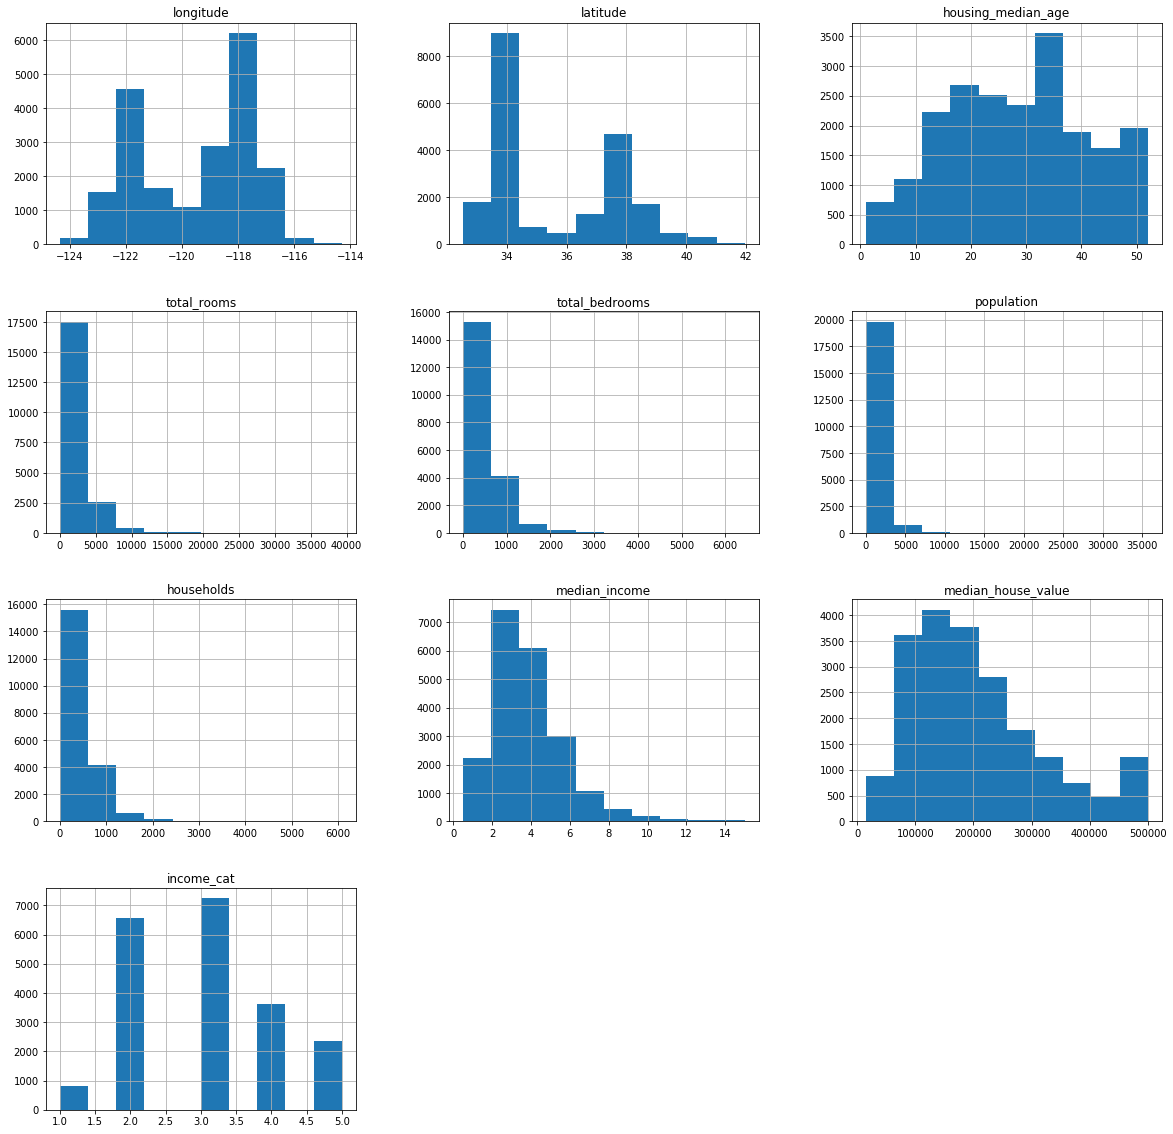

In [19]:
housing_data.hist(figsize=(20,20))
plt.show()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_data, housing_data['income_cat']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [21]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [22]:
housing = strat_train_set.copy()

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


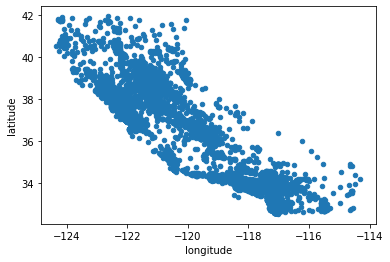

In [24]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')
plt.show()

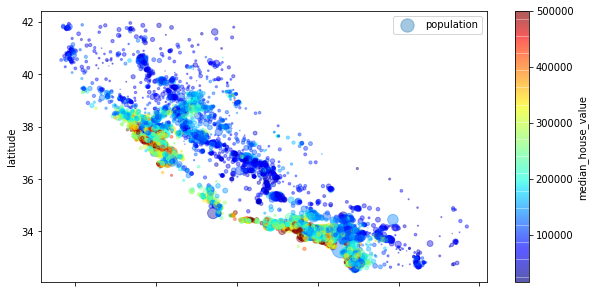

In [25]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, figsize=(10,5),
            s = housing['population']/100, label = 'population',
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [26]:
corr_matrix = housing.corr()

In [27]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84b9b89190>,
      dtype=object)

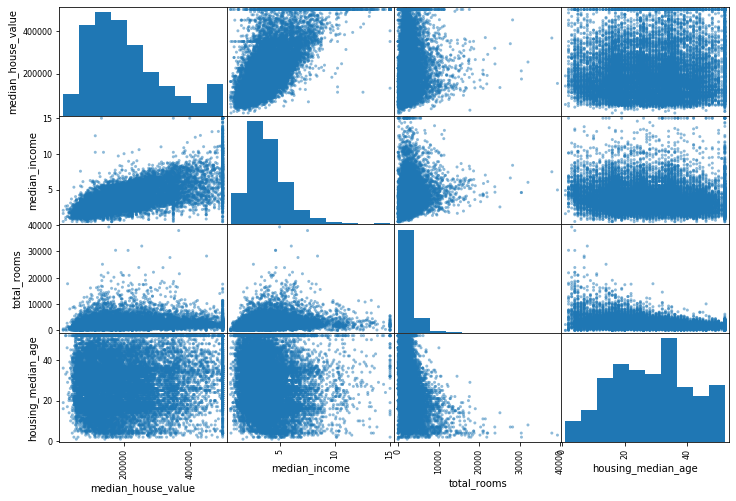

In [28]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize = (12,8))

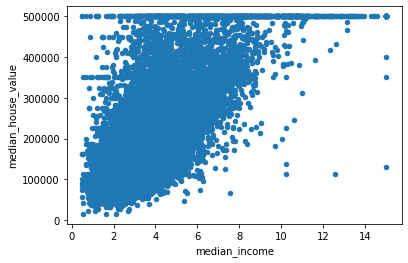

In [29]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value')
plt.show()

In [30]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [32]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [33]:
housing_new = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [34]:
housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [35]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer( strategy='median')

In [36]:
housing_num = housing_new.drop("ocean_proximity", axis = 1)

In [37]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [38]:
imputer.strategy

'median'

In [39]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [40]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [41]:
x = imputer.transform(housing_num)

In [42]:
x

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [43]:
housing_tr = pd.DataFrame(x, columns= housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [44]:
from sklearn.preprocessing import LabelEncoder
#assigning integers to category values
encoder = LabelEncoder()

In [45]:
housing_cat = housing_new['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [46]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [47]:
from sklearn.preprocessing import OneHotEncoder
#making those integers as array of [0,1,0,0,0] using value 1 at label for non zero value
encoder = OneHotEncoder()

In [48]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [49]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [50]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()

In [51]:
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Feature Scaling

Normalization done by value - min value and divided by diff of max-min it ranges from 0-1 by default

Standardization , value - mean value and divided by variance | not effected by outliers

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_lx, bedrooms_lx, population_lx, household_lx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x, y=None):
        rooms_per_household = x[:,rooms_lx]/x[:,household_lx]
        population_per_household = x[:,population_lx]/x[:,household_lx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:,bedrooms_lx]/x[:,rooms_lx]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[x, rooms_per_household, population_per_household]

In [53]:
housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [57]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
#credit to @hesenp 
class LabelBinarizerPipelineFriendly(LabelBinarizer):
#     def fit(self, X, y=None):
#         """this would allow us to fit the model based on the X input."""
#         super(LabelBinarizerPipelineFriendly, self).fit(X)
#     def transform(self, X, y=None):
#         return super(LabelBinarizerPipelineFriendly, self).transform(X)

    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizerPipelineFriendly()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline)
    ])

In [58]:
housing_prepared = full_pipeline.fit_transform(housing_new)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [59]:
housing_prepared.shape

(16512, 16)

In [60]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [61]:
some_data = housing_new.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions: ", lin_reg.predict(some_data_prepared))
print("true values: ", list(some_labels))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
true values:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [64]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def error_calculation(predictions):
    model_mse = mean_squared_error(housing_labels, predictions)
    model_r2 = r2_score(housing_labels, predictions)
    model_mae = mean_absolute_error(housing_labels, predictions)
    model_rmse = np.sqrt(model_mse)
    print("Mean squared error: ", model_mse)
    print("Mean absolute error: ", model_mae)
    print("Root Mean squared error: ", model_rmse)
    print("R2 score: ", model_r2)

In [65]:
error_calculation(lin_reg.predict(housing_prepared))

Mean squared error:  4709829587.971121
Mean absolute error:  49439.89599001897
Root Mean squared error:  68628.19819848923
R2 score:  0.6481624842804428


In [66]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [67]:
error_calculation(tree_reg.predict(housing_prepared))

Mean squared error:  0.0
Mean absolute error:  0.0
Root Mean squared error:  0.0
R2 score:  1.0


In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [69]:
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

In [70]:
display_scores(rmse_scores)

scores: [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
mean: 70666.74616904806
standard deviation: 2928.322738055112


In [71]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean: 69052.46136345083
standard deviation: 2731.674001798346


In [72]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [73]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [49557.6095063  47584.54435547 49605.349788   52325.13724488
 49586.9889247  53154.87424699 48800.48987508 47880.32844243
 52958.68645964 50046.17489414]
mean: 50150.018373763225
standard deviation: 1902.0697041387534


In [74]:
error_calculation(forest_reg.predict(housing_prepared))

Mean squared error:  348953392.9026591
Mean absolute error:  12082.19817163275
Root Mean squared error:  18680.294240259147
R2 score:  0.9739322001852575


### Fine Tune Model

gridsearch to apply all defined hyperparameters and pick out the best ones

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv =5, 
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [86]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [87]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [88]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64247.516675359955 {'max_features': 2, 'n_estimators': 3}
55617.40674323731 {'max_features': 2, 'n_estimators': 10}
52995.19294465475 {'max_features': 2, 'n_estimators': 30}
60505.89681340079 {'max_features': 4, 'n_estimators': 3}
52537.736606307 {'max_features': 4, 'n_estimators': 10}
50923.65172431889 {'max_features': 4, 'n_estimators': 30}
59132.6045922908 {'max_features': 6, 'n_estimators': 3}
52233.6498055419 {'max_features': 6, 'n_estimators': 10}
50021.29761927792 {'max_features': 6, 'n_estimators': 30}
58483.56525007155 {'max_features': 8, 'n_estimators': 3}
51960.48947607086 {'max_features': 8, 'n_estimators': 10}
50002.791785539426 {'max_features': 8, 'n_estimators': 30}
61976.14340248694 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54360.837513861916 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60265.00182957208 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52616.12875536769 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

using randomsearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


pprint(random_grid)

In [ ]:
rf_random = RandomizedSearchCV(estimator = forest_reg, 
                               param_distributions = random_grid, 
                               n_iter = 1, cv = 5, verbose=2,
                               random_state=42, n_jobs = -1)

rf_random.fit(housing_prepared, housing_labels)

In [ ]:

cvres = rf_random.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
rf_random.best_estimator_

In [89]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([6.92787184e-02, 6.69175865e-02, 4.16924425e-02, 1.49183029e-02,
       1.45989268e-02, 1.51483937e-02, 1.45645064e-02, 3.47794145e-01,
       5.53476288e-02, 1.14977318e-01, 7.44776883e-02, 4.19763424e-03,
       1.61230720e-01, 1.59084744e-04, 1.95232420e-03, 2.74457900e-03])

In [ ]:
extra_attribs = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
cat_one_hot_attribs = list(encoder.classes_)
attribs = num_attribs + extra_attribs + cat_one_hot_attribs
pprint(sorted(zip(feature_importance, attribs),reverse=True))

In [ ]:
feature_importances = rf_random.best_estimator_.feature_importances_
# grid_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
cat_one_hot_attribs = list(encoder.classes_)
attribs = num_attribs + extra_attribs + cat_one_hot_attribs
pprint(sorted(zip(feature_importances, attribs),reverse=True))

In [ ]:
def evaluate(model):
    predictions = model.predict(housing_prepared)
    errors = abs(predictions - housing_labels)
    mape = 100 * np.mean(errors/ housing_labels)
    accuracy = 100 - mape

    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [ ]:
rf_random.best_params_

In [ ]:
test_model_rf = RandomForestRegressor(n_estimators=1400, min_samples_split=5,
                                  min_samples_leaf=1, max_features='sqrt', max_depth=80,
                                  bootstrap='False')

test_model_rf.fit(housing_prepared, housing_labels)

In [ ]:
evaluate(test_model_rf)

In [ ]:
test_model_rf1 = rf_random.best_estimator_
evaluate(test_model_rf1)

In [ ]:
grid_search.best_params_

In [ ]:
test_model_gsc = RandomForestRegressor(n_estimators = 30, max_features=6)

test_model_gsc.fit(housing_prepared, housing_labels)

In [ ]:
evaluate(test_model_gsc)

In [ ]:
test_model_gsc1 = grid_search.best_estimator_
evaluate(test_model_gsc1)

## Evaluate from test set

In [ ]:
final_model = rf_random.best_estimator_
final_model1 = grid_search.best_estimator_

x_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

x_test_prepared = full_pipeline.transform(x_test)

# final_predictions = final_model.predict(x_test_prepared)


In [76]:
def evaluate1(model, housing_prepared, housing_labels):
    predictions = model.predict(housing_prepared)
    errors = abs(predictions - housing_labels)
    mape = 100 * np.mean(errors/ housing_labels)
    accuracy = 100 - mape

    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [ ]:
evaluate1(final_model, x_test_prepared, y_test)

In [ ]:
evaluate1(grid_search, x_test_prepared, y_test)

In [ ]:
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
final_predictions = final_model1.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

## Exercise

In [75]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'kernel': ['linear'],
        'C': [10., 30., 100.]
    },
    {
        'kernel': ['rbf'],
        'C': [1.0, 3.0, 10., 30.],
        'gamma': [0.01, 0.03, 0.1]
    },
]

svr_reg = SVR()

grid_svr = GridSearchCV(svr_reg,
                        param_grid,
                        cv=3,
                        scoring='neg_mean_squared_error')

grid_svr.fit(housing_prepared, housing_labels)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0], 'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0],
                          'gamma': [0.01, 0.03, 0.1], 'kernel': ['rbf']}],
             scoring='neg_mean_squared_error')

In [80]:
grid_svr.best_estimator_

SVR(C=100.0, kernel='linear')

In [79]:
evaluate1(grid_svr, housing_prepared, housing_labels)

Model Performance
Average Error: 48578.0645 degrees.
Accuracy = 74.68%.


74.68349274453395

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin


def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])


class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importance, k):
        self.feature_importance = feature_importance
        self.k = k

    def fit(self, x, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importance,
                                                 self.k)
        return self

    def transform(self, x, y=None):
        return x[:, self.feature_indices_]

In [90]:
k = 5
top_features_indices = indices_of_top_k(feature_importance, k)
top_features_indices

array([ 0,  7,  9, 10, 12])

In [91]:
np.array(attributes)[top_features_indices]

IndexError: index 7 is out of bounds for axis 0 with size 4